In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
df=pd.read_csv('new.csv')
df.head(30)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-31,3733.270020,3760.199951,3726.879883,3756.070068,3756.070068,3172510000
1,2021-01-04,3764.610107,3769.989990,3662.709961,3700.649902,3700.649902,5006680000
2,2021-01-05,3698.020020,3737.830078,3695.070068,3726.860107,3726.860107,4582620000
3,2021-01-06,3712.199951,3783.040039,3705.340088,3748.139893,3748.139893,6049970000
4,2021-01-07,3764.709961,3811.550049,3764.709961,3803.790039,3803.790039,5080870000
5,2021-01-08,3815.050049,3826.689941,3783.600098,3824.679932,3824.679932,4764180000
6,2021-01-11,3803.139893,3817.860107,3789.020020,3799.610107,3799.610107,4450500000
7,2021-01-12,3801.620117,3810.780029,3776.510010,3801.189941,3801.189941,4977210000
8,2021-01-13,3802.229980,3820.959961,3791.500000,3809.840088,3809.840088,4590420000
9,2021-01-14,3814.979980,3823.600098,3792.860107,3795.540039,3795.540039,5180140000


In [3]:
df.shape

(252, 7)

In [40]:
df.shape
df.reshape(-1,1)

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [4]:
df=df[['Close']]
df.head(30)

,Close
0,3756.070068
1,3700.649902
2,3726.860107
3,3748.139893
4,3803.790039
5,3824.679932
6,3799.610107
7,3801.189941
8,3809.840088
9,3795.540039


In [5]:
future=60
df['Prediction']=df[['Close']].shift(-future)
df.head(30)

,Close,Prediction
0,3756.070068,3958.550049
1,3700.649902,3972.889893
2,3726.860107,4019.870117
3,3748.139893,4077.909912
4,3803.790039,4073.939941
5,3824.679932,4079.949951
6,3799.610107,4097.169922
7,3801.189941,4128.799805
8,3809.840088,4127.990234
9,3795.540039,4141.589844


In [8]:
 # Creation of Feature Datset and making it into numpy based arrays
X=np.array(df.drop(['Prediction'],1))[:-future]
print(X)

[[3756.07006836]
 [3700.64990234]
 [3726.86010742]
 [3748.13989258]
 [3803.79003906]
 [3824.67993164]
 [3799.61010742]
 [3801.18994141]
 [3809.84008789]
 [3795.54003906]
 [3768.25      ]
 [3798.90991211]
 [3851.85009766]
 [3853.07006836]
 [3841.4699707 ]
 [3855.36010742]
 [3849.62011719]
 [3750.77001953]
 [3787.37988281]
 [3714.23999023]
 [3773.86010742]
 [3826.31005859]
 [3830.16992188]
 [3871.73999023]
 [3886.83007812]
 [3915.59008789]
 [3911.22998047]
 [3909.87988281]
 [3916.37988281]
 [3934.83007812]
 [3932.59008789]
 [3931.33007812]
 [3913.9699707 ]
 [3906.70996094]
 [3876.5       ]
 [3881.37011719]
 [3925.42993164]
 [3829.34008789]
 [3811.14990234]
 [3901.82006836]
 [3870.29003906]
 [3819.7199707 ]
 [3768.4699707 ]
 [3841.93994141]
 [3821.35009766]
 [3875.43994141]
 [3898.81005859]
 [3939.34008789]
 [3943.34008789]
 [3968.93994141]
 [3962.70996094]
 [3974.12011719]
 [3915.45996094]
 [3913.10009766]
 [3940.59008789]
 [3910.52001953]
 [3889.13989258]
 [3909.52001953]
 [3974.5400390

C:\Users\Admin\AppData\Local\Temp\ipykernel_16696\1322010595.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=np.array(df.drop(['Prediction'],1))[:-future]


In [6]:
#Target Dataset
Y=np.array(df["Prediction"])[:-future]
print(Y)


[3958.55004883 3972.88989258 4019.87011719 4077.90991211 4073.93994141
 4079.94995117 4097.16992188 4128.79980469 4127.99023438 4141.58984375
 4124.66015625 4170.41992188 4185.47021484 4163.25976562 4134.93994141
 4173.41992188 4134.97998047 4180.16992188 4187.62011719 4186.72021484
 4183.18017578 4211.47021484 4181.16992188 4192.66015625 4164.66015625
 4167.58984375 4201.62011719 4232.60009766 4188.43017578 4152.10009766
 4063.04003906 4112.5        4173.85009766 4163.29003906 4127.83007812
 4115.68017578 4159.12011719 4155.85986328 4197.04980469 4188.12988281
 4195.99023438 4200.87988281 4204.10986328 4202.04003906 4208.12011719
 4192.85009766 4229.89013672 4226.52001953 4227.25976562 4219.54980469
 4239.18017578 4247.43994141 4255.14990234 4246.58984375 4223.70019531
 4221.85986328 4166.45019531 4224.79003906 4246.43994141 4241.83984375
 4266.49023438 4280.70019531 4290.60986328 4291.79980469 4297.5
 4319.93994141 4352.33984375 4343.54003906 4358.12988281 4320.81982422
 4369.5498046

In [9]:
 #Splitting into training set and test set
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

In [10]:
#Creation of the required models
tree=DecisionTreeRegressor().fit(x_train,y_train)
lr=LinearRegression().fit(x_train,y_train)

In [11]:
x_future=df.drop(['Prediction'],1)[:-future]
x_future=x_future.tail(future)
x_future=np.array(x_future)
x_future

C:\Users\Admin\AppData\Local\Temp\ipykernel_16696\2614933592.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future=df.drop(['Prediction'],1)[:-future]


array([[4369.20996094],
       [4374.29980469],
       [4360.02978516],
       [4327.16015625],
       [4258.49023438],
       [4323.06005859],
       [4358.68994141],
       [4367.47998047],
       [4411.79003906],
       [4422.29980469],
       [4401.45996094],
       [4400.64013672],
       [4419.14990234],
       [4395.25976562],
       [4387.16015625],
       [4423.14990234],
       [4402.66015625],
       [4429.10009766],
       [4436.52001953],
       [4432.35009766],
       [4436.75      ],
       [4442.41015625],
       [4460.83007812],
       [4468.        ],
       [4479.70996094],
       [4448.08007812],
       [4400.27001953],
       [4405.79980469],
       [4441.66992188],
       [4479.52978516],
       [4486.22998047],
       [4496.18994141],
       [4470.        ],
       [4509.37011719],
       [4528.79003906],
       [4522.68017578],
       [4524.08984375],
       [4536.95019531],
       [4535.43017578],
       [4520.02978516],
       [4514.06982422],
       [4493.279

In [12]:
 # Prediction of Tree Model Prediction & also Linear Model
tree_prediction=tree.predict(x_future)
print(tree_prediction)
print()
lr_prediction=lr.predict(x_future)
print(lr_prediction)


[4471.37011719 4399.75976562 4391.33984375 4363.79980469 4357.72998047
 4363.79980469 4438.25976562 4471.37011719 4486.45996094 4519.62988281
 4536.18994141 4549.77978516 4544.89990234 4566.47998047 4574.79003906
 4551.68017578 4596.41992188 4605.37988281 4613.66992188 4630.64990234
 4660.56982422 4680.06005859 4701.70019531 4701.70019531 4685.25
 4646.70996094 4649.27001953 4682.85009766 4680.06005859 4685.25
 4688.66992188 4704.54003906 4697.95996094 4682.93994141 4690.70019531
 4701.45996094 4594.62011719 4567.         4567.         4513.04003906
 4577.10009766 4538.43017578 4701.70019531 4686.75       4701.20996094
 4667.45019531 4712.02001953 4668.97021484 4634.08984375 4352.62988281
 4668.66992188 4646.70996094 4646.70996094 4649.22998047 4352.62988281
 4725.79003906 4791.18994141 4634.08984375 4455.47998047 4778.72998047]

[4554.39953525 4558.19688927 4547.55052788 4523.02764988 4471.79542814
 4519.96871073 4546.55091742 4553.10885746 4586.16703905 4594.00800681
 4578.46012985 4

C:\Users\Admin\AppData\Local\Temp\ipykernel_16696\629667340.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"]=predictions


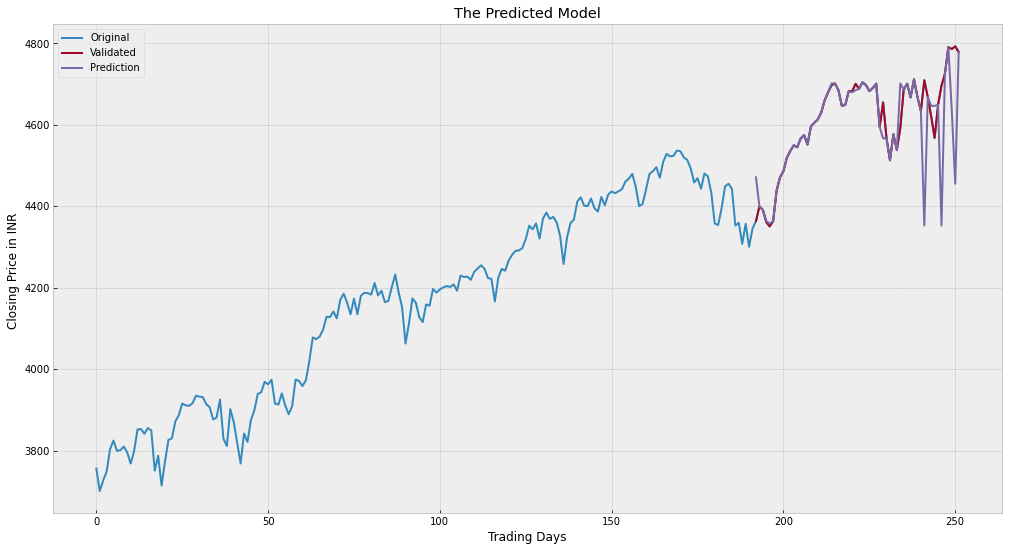

In [13]:
 # Analysis & Deployment of Data
predictions=tree_prediction
valid=df[X.shape[0]:]
valid["Predictions"]=predictions
plt.figure(figsize=(17,9))
plt.title("The Predicted Model")
plt.xlabel("Trading Days")
plt.ylabel("Closing Price in INR ")
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(["Original","Validated","Prediction"])
plt.show()


In [14]:
import pandas as pd
import io
#after training & testing the code, the statistical measures are:
tp = pd.read_csv("new.csv",chunksize=2)
print(tp)

dfs = []
for t in tp:
    df = pd.DataFrame(t)
    df1 = df.describe()
    dfs.append(df1.T)
    
df2 = pd.concat(dfs)
print(df2)


           count          mean           std           min           25%  \
Open         2.0  3.748940e+03  2.216079e+01  3.733270e+03  3.741105e+03   
High         2.0  3.765095e+03  6.922603e+00  3.760200e+03  3.762647e+03   
Low          2.0  3.694795e+03  4.537499e+01  3.662710e+03  3.678752e+03   
Close        2.0  3.728360e+03  3.918798e+01  3.700650e+03  3.714505e+03   
Adj Close    2.0  3.728360e+03  3.918798e+01  3.700650e+03  3.714505e+03   
...          ...           ...           ...           ...           ...   
High         2.0  4.806495e+03  3.443693e+00  4.804060e+03  4.805278e+03   
Low          2.0  4.776705e+03  1.944544e+00  4.775330e+03  4.776018e+03   
Close        2.0  4.785895e+03  1.013290e+01  4.778730e+03  4.782312e+03   
Adj Close    2.0  4.785895e+03  1.013290e+01  4.778730e+03  4.782312e+03   
Volume       2.0  2.380180e+09  1.528765e+07  2.369370e+09  2.374775e+09   

                    50%           75%           max  
Open       3.748940e+03  3.756775

In [15]:
 from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
r2_score = regressor.score(x_test,y_test)
print("Acccuracy of predicting the stocking prices: ")
print(r2_score*100,'%')


Acccuracy of predicting the stocking prices: 
73.2274636571903 %


In [16]:
import pandas as pd
import numpy as np
import math
import datetime as dt
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU
from itertools import cycle
import numpy as np 
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [17]:
def Model_Comparision_Train_Test(AllModels, x_train, y_train, x_test, y_test):
    return_df = pd.DataFrame(columns=['Model', 'MSE', 'RMSE', 'MAE'])
    for myModel in AllModels:
        myModel.fit(x_train, y_train)

        #predict, confusion matrix metrics on train
        y_pred_train = myModel.predict(x_train)
        mse_train, rmse_train, mae_train = extract_metrics_from_predicted(y_train,y_pred_train)
        #print(accuracy_train,sensitivity_train,prec_train,f1score_train)

        #predict, confusion matrix metrics on test
        y_pred_test = myModel.predict(x_test)
        mse_test, rmse_test, mae_test = extract_metrics_from_predicted(y_test, y_pred_test)
        #print(accuracy_test,sensitivity_test,prec_test,f1score_test)

        #create a summary dataframe
        summary = pd.DataFrame([[type(myModel).__name__,
                                         ''.join([str(round(mse_test,3)), "(", str(round(mse_train,3)), ")"]),
                                         ''.join([str(round(rmse_test,3)), "(", str(round(rmse_train,3)), ")"]),
                                         ''.join([str(round(mae_test,3)), "(", str(round(mae_test,3)), ")"])]],
                                         columns=['Model', 'MSE', 'RMSE', 'MAE'])
        return_df = pd.concat([return_df, summary], axis=0)

    #remove index and make model index
    return_df.set_index('Model', inplace=True)
    return(return_df)



def extract_metrics_from_predicted(y_true, y_pred):
    from sklearn.metrics import mean_squared_error,mean_absolute_error 
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return (mse, rmse,mae)


In [19]:
Close = np.array([3756.07,3700.649902,3726.860107,3748.139893])
Prediction = np.array([3958.550049,3972.889893,4019.870117,4077.909912])
x = list(range(len(Close)))

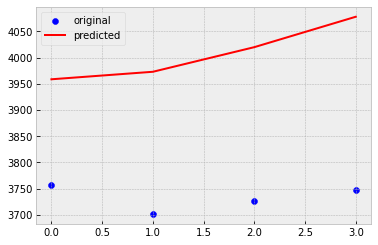

In [20]:
plt.scatter(x, Close, color="blue", label="original")
plt.plot(x, Prediction, color="red", label="predicted")
plt.legend()
plt.show() 

In [21]:
#Metrics calculation by formula 

#By using the above formulas, we can easily calculate them in Python.

# calculate manually
d = Close - Prediction
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((Close-np.mean(Close))**2))

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)

Results by manual calculation:
MAE: 274.3750172499999
MSE: 77428.97858354572
RMSE: 278.2606306748149
R-Squared: -166.80869625178883


In [22]:
#Metrics calculation by sklearn.metrics

#Sklearn provides the number of metrics to evaluate accuracy. The next method is to calculate metrics with sklearn functions.

mae = metrics.mean_absolute_error(Close, Prediction)
mse = metrics.mean_squared_error(Close, Prediction)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(Close,Prediction)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 274.3750172499999
MSE: 77428.97858354572
RMSE: 278.2606306748149
R-Squared: -166.80869625178883


In [25]:
print("Train data RMSE:", math.sqrt(mean_squared_error(Close,Prediction)))
print("Train data MSE:", metrics.math_squared_error(Close,Prediction))
print("Train data MAE:", metrics.math_absolute_error(Close,Prediction))
print("----------------------------------------------------------")




Train data RMSE: 278.2606306748149


AttributeError: module 'sklearn.metrics' has no attribute 'math_squared_error'

In [26]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [28]:
# Creating instance of Linear Regresssion with Normalised Data
lr = LR(normalize = True)
# Fitting the model
lr.fit(x_train, y_train)

E:\PYTHON\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [31]:
# Predicting over the Train Set and calculating error
Close = lr.predict(x_train)
k = mae(Close, y_train)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 58.72685022059821


In [32]:
# Predicting over the Test Set and calculating error
Prediction = lr.predict(x_test)
k = mae(Prediction, y_test)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     74.49292905780352


In [36]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
# Predicting over the Test Set and calculating error
Prediction = lr.predict(x_test)
k = rmse(Prediction, y_test)
print('Test Mean Absolute Error    ', k )

TypeError: 'numpy.float64' object is not callable

In [34]:
print(confusion_matrix(Close, Prediction))

NameError: name 'confusion_matrix' is not defined

In [37]:
print(confusion_matrix(Close, Prediction))

ValueError: Found input variables with inconsistent numbers of samples: [144, 48]

In [38]:
x.shape
x.reshape(-1,1)

AttributeError: 'list' object has no attribute 'shape'

In [42]:
from sklearn import metrics
metrics.confusion_matrix(Close,Prediction)

ValueError: Found input variables with inconsistent numbers of samples: [144, 48]